In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 42.6 MB/s eta 0:00:00


In [26]:
import sys
import importlib

# Remove 'helper' from sys.modules if it's already loaded
# to ensure the latest version with new functions is imported.
if 'helper' in sys.modules:
    del sys.modules['helper']

from helper import load_image_from_url, render_results_in_image

In [25]:
from PIL import ImageDraw

def render_results_in_image(image, results):
    draw = ImageDraw.Draw(image)
    for res in results:
        box = res['box']
        label = res['label']
        score = res['score']
        xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']

        draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="red", width=2)
        draw.text((xmin, ymin), f"{label}: {score:.2f}", fill="red")
    return image


# Overwrite the existing helper.py with the new implementation
with open('helper.py', 'w') as f:
    f.write("import warnings\n")
    f.write("from PIL import ImageDraw\n")
    f.write("\n")
    f.write("def ignore_warnings():\n")
    f.write("    warnings.filterwarnings(\"ignore\", category=FutureWarning)\n")
    f.write("    warnings.filterwarnings(\"ignore\", category=UserWarning)\n")
    f.write("\n")
    f.write("def load_image_from_url(url):\n")
    f.write("    raise NotImplementedError(\"load_image_from_url is not implemented yet. Please provide its implementation.\")\n")
    f.write("\n")
    f.write("def render_results_in_image(image, results):\n")
    f.write("    draw = ImageDraw.Draw(image)\n")
    f.write("    for res in results:\n")
    f.write("        box = res['box']\n")
    f.write("        label = res['label']\n")
    f.write("        score = res['score']\n")
    f.write("        xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']\n")
    f.write("\n")
    f.write("        draw.rectangle(((xmin, ymin), (xmax, ymax)), outline=\"red\", width=2)\n")
    f.write("        draw.text((xmin, ymin), f\"{label}: {score:.2f}\", fill=\"red\")\n")
    f.write("    return image\n")
print("Updated 'helper.py' with implementation for 'render_results_in_image'.")

Updated 'helper.py' with implementation for 'render_results_in_image'.


In [3]:
import os

file_path = 'helper.py'
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("# This is a placeholder for your helper functions. \n")
        f.write("# Add your load_image_from_url and render_results_in_image functions here.\n")
    print(f"Created empty {file_path}")
else:
    print(f"{file_path} already exists.")

Created empty helper.py


In [4]:
from transformers import pipeline

In [6]:
import warnings

def ignore_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=UserWarning)

# Append the function to helper.py
with open('helper.py', 'a') as f:
    f.write("\nimport warnings\n\ndef ignore_warnings():\n    warnings.filterwarnings(\"ignore\", category=FutureWarning)\n    warnings.filterwarnings(\"ignore\", category=UserWarning)\n")
print("Added 'ignore_warnings' function to helper.py")

Added 'ignore_warnings' function to helper.py


In [8]:
from transformers.utils import logging
logging.set_verbosity_error()

import importlib
import sys

# Check if 'helper' is in sys.modules and reload it if it is,
# to ensure changes to helper.py are picked up.
if 'helper' in sys.modules:
    del sys.modules['helper']

from helper import ignore_warnings
ignore_warnings()

In [10]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [11]:
from PIL import Image

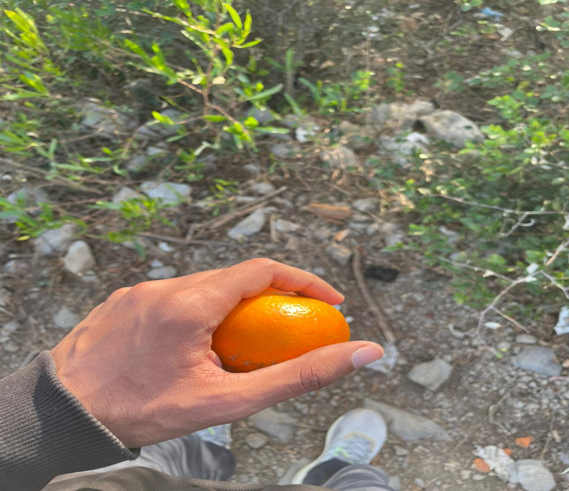

In [15]:
raw_image = Image.open('WhatsApp Image 2025-12-25 at 11.01.22 PM.jpeg')
raw_image.resize((569, 491))

In [13]:
from google.colab import files

print("Please select 'huggingface_friends.jpg' to upload.")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Please select 'huggingface_friends.jpg' to upload.


Saving WhatsApp Image 2025-12-25 at 11.01.22 PM.jpeg to WhatsApp Image 2025-12-25 at 11.01.22 PM.jpeg
User uploaded file "WhatsApp Image 2025-12-25 at 11.01.22 PM.jpeg" with length 160120 bytes


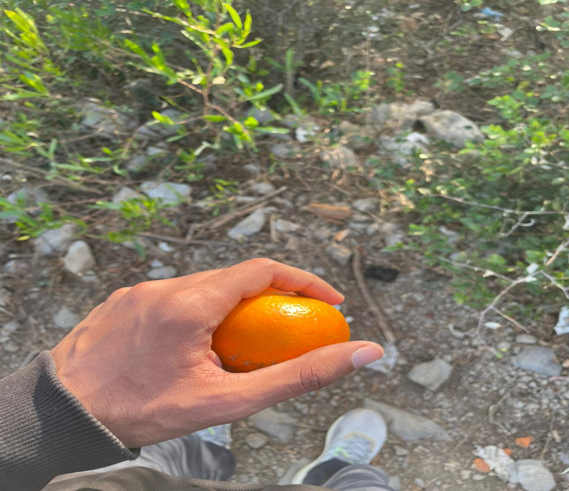

In [16]:
raw_image = Image.open('WhatsApp Image 2025-12-25 at 11.01.22 PM.jpeg')
raw_image.resize((569, 491))

In [17]:
with open('helper.py', 'a') as f:
    f.write("\n# Placeholder for load_image_from_url\n")
    f.write("def load_image_from_url(url):\n")
    f.write("    \"\"\"\n")
    f.write("    Placeholder function to load an image from a URL.\n")
    f.write("    This function currently raises an error as it's not implemented.\n")
    f.write("    \"\"\"\n")
    f.write("    raise NotImplementedError(\"load_image_from_url is not implemented yet. Please provide its implementation.\")\n")

    f.write("\n# Placeholder for render_results_in_image\n")
    f.write("def render_results_in_image(image, results):\n")
    f.write("    \"\"\"\n")
    f.write("    Placeholder function to render object detection results on an image.\n")
    f.write("    This function currently raises an error as it's not implemented.\n")
    f.write("    \"\"\"\n")
    f.write("    raise NotImplementedError(\"render_results_in_image is not implemented yet. Please provide its implementation.\")\n")

print("Added placeholder functions 'load_image_from_url' and 'render_results_in_image' to helper.py")

Added placeholder functions 'load_image_from_url' and 'render_results_in_image' to helper.py


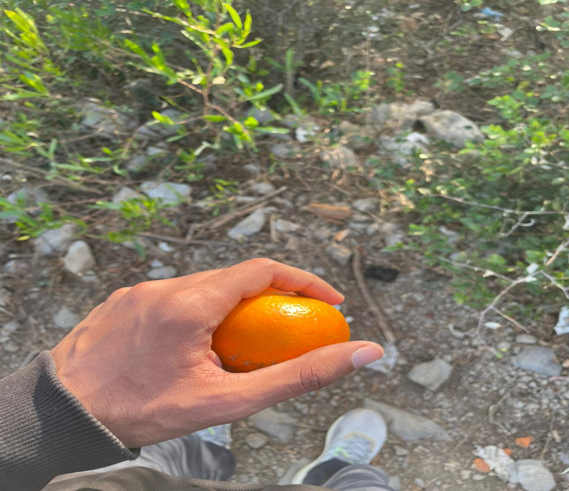

In [19]:
raw_image = Image.open('WhatsApp Image 2025-12-25 at 11.01.22 PM.jpeg')
raw_image.resize((569, 491))

In [20]:
pipeline_output = od_pipe(raw_image)

In [27]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

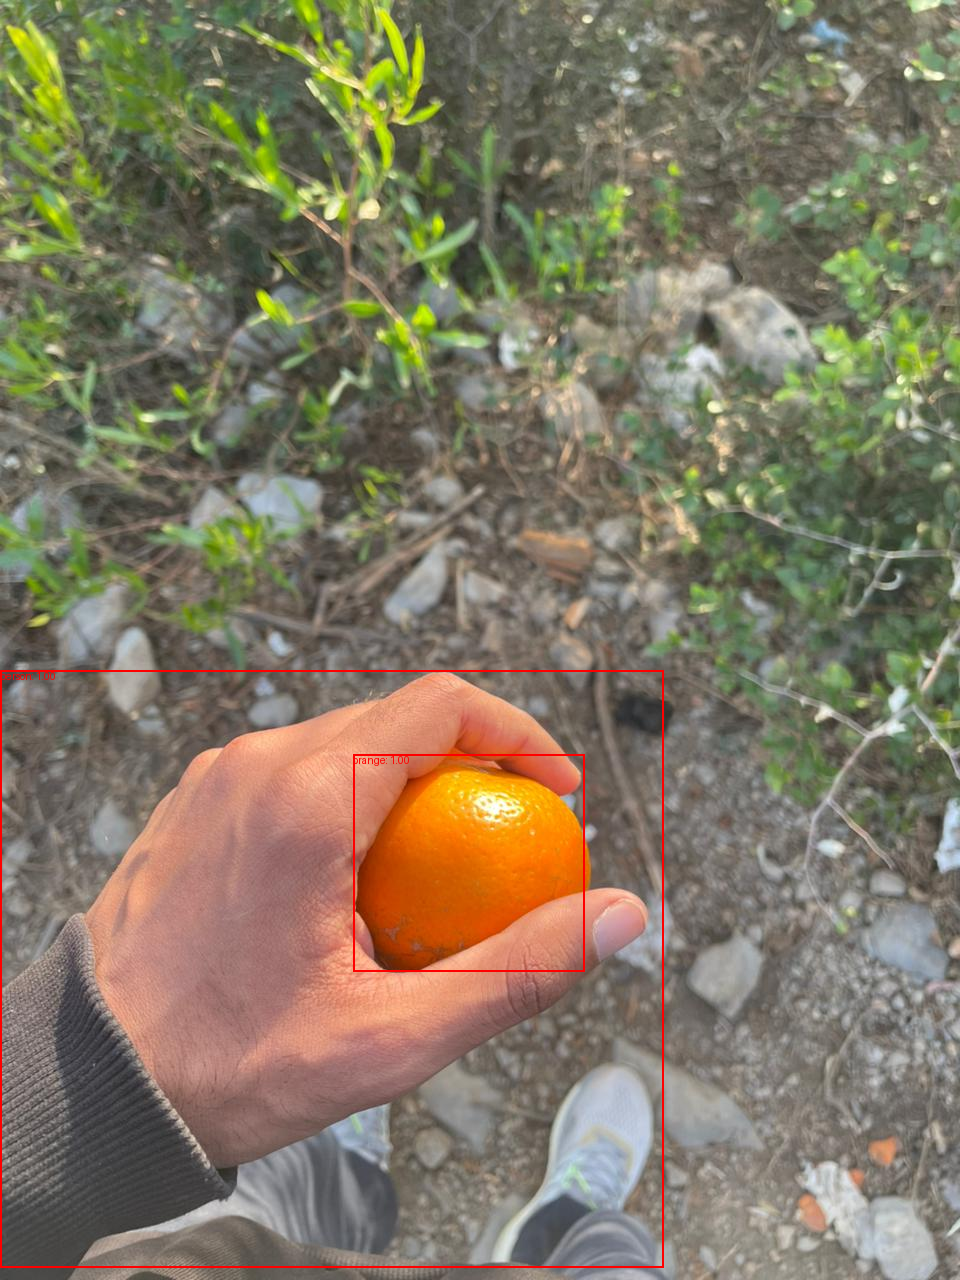

In [28]:
processed_image

In [29]:
import os
import gradio as gr

In [30]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [31]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

NameError: name 'demo' is not defined

In [34]:
demo = gr.Interface(fn=get_pipeline_prediction,
                    inputs=gr.Image(type="pil"),
                    outputs=gr.Image(type="pil"),
                    title="Object Detection with DETR-ResNet-50")

In [36]:
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1fc6d2670e0fd642fc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
